In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes, tree
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../data/model_ready.csv')

In [5]:
df.rename(columns={'main_category_Comics': 'Comics',
                   'main_category_Crafts': 'Crafts', 
                   'main_category_Dance': 'Dance', 
                   'main_category_Design': 'Design',
                   'main_category_Fashion': 'Fashion', 
                   'main_category_Film & Video': 'Film_Video',
                   'main_category_Food': 'Food', 
                   'main_category_Games': 'Games', 
                   'main_category_Journalism': 'Journalism',
                   'main_category_Music': 'Music', 
                   'main_category_Photography': 'Photography',
                   'main_category_Publishing': 'Publishing', 
                   'main_category_Technology': 'Technology',
                   'main_category_Theater': 'Theater'}, inplace=True)
df.columns

Index(['success', 'goal_usd', 'country_US', 'cam_duration', 'prep_duration',
       'desc_length', 'staff_pick_True', 'Comics', 'Crafts', 'Dance', 'Design',
       'Fashion', 'Film_Video', 'Food', 'Games', 'Journalism', 'Music',
       'Photography', 'Publishing', 'Technology', 'Theater'],
      dtype='object')

In [6]:
X, y = df.drop(['success'], axis=1), df.success

X_mid, X_test, y_mid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

In [8]:
param_grid= dict(
    max_depth = [3,4,5,6,7,8,9,10],
    min_child_weight=[1,2,3,4,5,6,7,8,9,10,11]
)
xg_grid_search = XGBClassifier()
xg_grid = GridSearchCV(xg_grid_search, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
xg_grid.fit(X_train, y_train)
xg_grid_pred = xg_grid.predict(X_val)

xg_best_params = xg_grid.best_params_
xg_best_estimator = xg_grid.best_estimator_
xg_best_cm = confusion_matrix(y_val, xg_grid_pred)
xg_best_cr = classification_report(y_val, xg_grid_pred)

print(xg_best_params)
print(xg_best_estimator)
print('confusion matrix:')
print(xg_best_cm)
print(xg_best_cr)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


/Users/crystalhuang/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:06:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 4, 'min_child_weight': 7}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
confusion matrix:
[[ 7675  4628]
 [ 2752 15211]]
              prec

In [9]:
xg_y_score = xg_grid.predict_proba(X_val)[:,1]
xg_grid_fpr, xg_grid_tpr, auc_thresholds = roc_curve(y_val, xg_y_score)
roc_auc_xg_grid = auc(xg_grid_fpr, xg_grid_tpr)
print(roc_auc_xg_grid)

0.8243731122888641


In [8]:
# retrain model with best params and get test scores
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
xgBoost_v = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgBoost_v.fit(X_train, y_train)
xgBoost_pred_v = xgBoost.predict(X_val)

xgBoost_ac_v = xgBoost_v.score(X_val, y_val)
xgBoost_precision_v = precision_score(y_val, xgBoost_pred_v)
xgBoost_recall_v = recall_score(y_val, xgBoost_pred_v)
xgBoost_f1_v = f1_score(y_val, xgBoost_pred_v)

xgBoost_y_score_v = xgBoost_v.predict_proba(X_val)[:, 1]
xgBoost_fpr_v, xgBoost_tpr_v, auc_thresholds_v = roc_curve(y_val, xgBoost_y_score_v)
roc_auc_xgb_v = auc(xgBoost_fpr_v, xgBoost_tpr_v)

[17:34:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [9]:
xgBoost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgBoost.fit(X_mid, y_mid)
xgBoost_pred = xgBoost.predict(X_test)

xgBoost_ac = xgBoost.score(X_test, y_test)
xgBoost_precision = precision_score(y_test, xgBoost_pred)
xgBoost_recall = recall_score(y_test, xgBoost_pred)
xgBoost_f1 = f1_score(y_test, xgBoost_pred)

xgBoost_y_score = xgBoost.predict_proba(X_test)[:, 1]
xgBoost_fpr, xgBoost_tpr, auc_thresholds = roc_curve(y_test, xgBoost_y_score)
roc_auc_xgb = auc(xgBoost_fpr, xgBoost_tpr)

[17:18:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [21]:
print('XGBoost val score: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (xgBoost_ac_v, 
         xgBoost_precision_v, 
         xgBoost_recall_v,
         xgBoost_f1_v,
         roc_auc_xgb_v)
     )
print('XGBoost test score: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (xgBoost_ac, 
         xgBoost_precision, 
         xgBoost_recall,
         xgBoost_f1,
         roc_auc_xgb)
     )

XGBoost val score: 
 Accuracy: 0.7562 
 Precision: 0.7702 
 Recall: 0.8482 
 F1: 0.8073 
 ROC: 0.8244
XGBoost test score: 
 Accuracy: 0.7501 
 Precision: 0.7620 
 Recall: 0.8408 
 F1: 0.7995 
 ROC: 0.8166


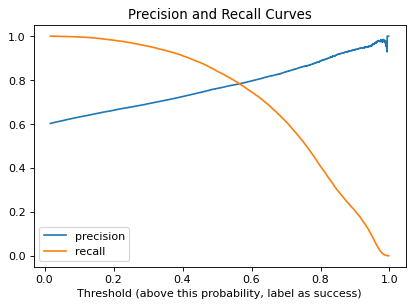

In [11]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, xgBoost.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as success)');
plt.title('Precision and Recall Curves');

In [12]:
from numpy import argmax
J = xgBoost_tpr - xgBoost_fpr
ix = argmax(J)
best_thresh = auc_thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.607468


In [15]:
def make_confusion_matrix(model, threshold=0.6):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:,1] >=threshold)
    cm = confusion_matrix(y_test, y_predict)
    
    plt.figure(figsize=(25,7))
    plt.subplot(131)
    ax = sns.heatmap(cm, annot=True, cmap='Greens', cbar=False, annot_kws={"size":20}, fmt='g')
    cmlabels = ['True Negatives', "False Positives",
               'Flase Negatives', "True Positives"]
    for i,t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix - XGBoost', size=25)
    plt.xlabel('Predicted Campaign Outcome', size=20)
    plt.ylabel('Actual Campaign Outcome', size=20)
    labels = ['Fail', 'Success']
    ax.set_xticklabels(labels, size=15)
    ax.set_yticklabels(labels, size=15)
    plt.tight_layout();

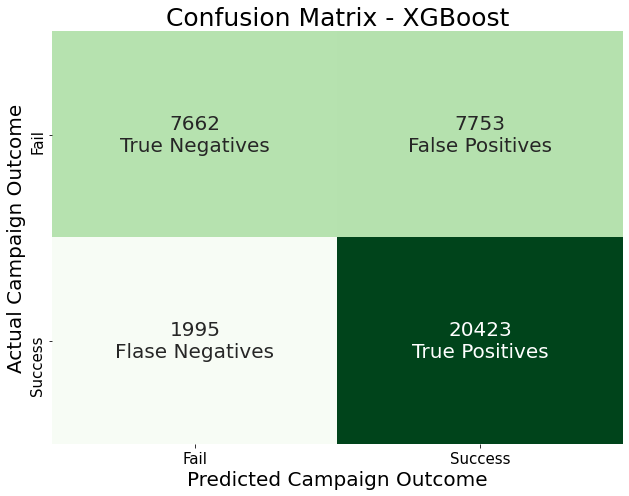

In [16]:
# try a lower threshold for testing
make_confusion_matrix(xgBoost, 0.40)

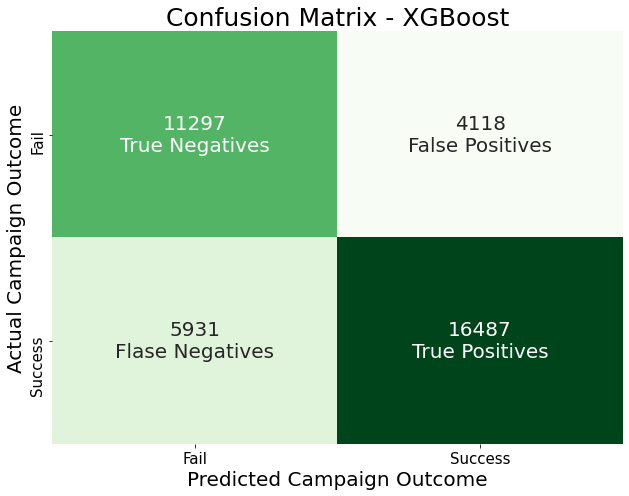

In [17]:
# using the best threshold
make_confusion_matrix(xgBoost, 0.61)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

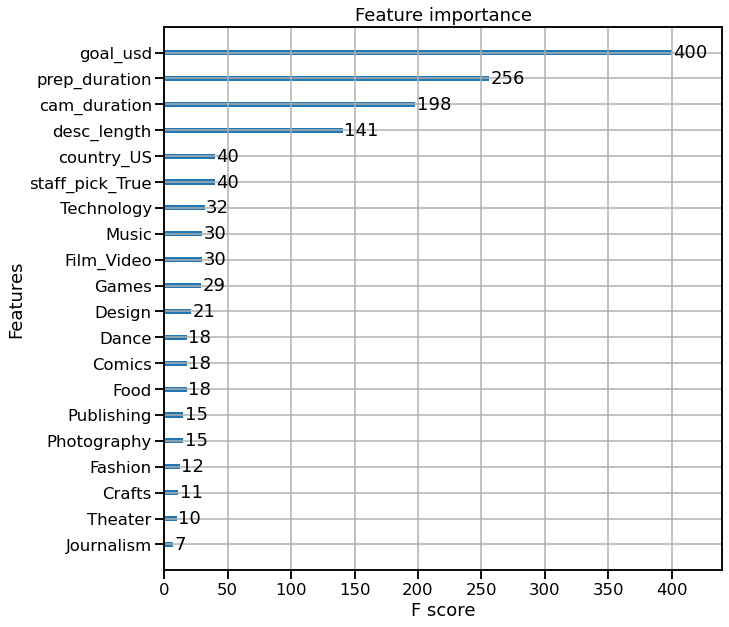

In [18]:
sns.set_context('talk')
fig, ax = plt.subplots(1,1, figsize=(10,10))
xgb.plot_importance(xgBoost, max_num_features=30, ax=ax)